Home Work 4
* Amit Avioz - 315023648
* Shahar Adar - 207031311

# Dataset and stuff

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_data(df, is_train=True):
    processed_df = df.copy()

    if is_train:
        processed_df = processed_df[processed_df["SalePrice"] < 350000]
        processed_df = processed_df[processed_df["SalePrice"] < 350000]
        processed_df = processed_df[processed_df["GarageArea"]  <= 1000 ]
        processed_df = processed_df[processed_df["TotalBsmtSF"]  <= 3000 ]
        processed_df = processed_df[processed_df["GrLivArea"]  <= 3000 ]
        processed_df = processed_df[processed_df["LotArea"]  <= 50000 ]

    # Apply preprocessing steps
    processed_df = processed_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'Id'], axis=1)
    processed_df["GarageVolume"] = processed_df["GarageCars"] * processed_df["GarageArea"]
    processed_df["GarageAreaRatio"] = processed_df["GarageArea"] / processed_df["GrLivArea"]
    processed_df.replace({"ExterQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}}, inplace=True)
    processed_df["OverallQual"] = processed_df["OverallQual"] / processed_df["OverallQual"].max()
    processed_df["ExterQual"] = (processed_df["ExterQual"] - processed_df["ExterQual"].min()) / (processed_df["ExterQual"].max() - processed_df["ExterQual"].min())
    processed_df["TotalQuall"] = (processed_df["OverallQual"] + processed_df["ExterQual"]) / 2
    processed_df.replace({"HeatingQC": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po" : 0}}, inplace=True)
    processed_df.replace({"GarageQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po" : 0}}, inplace=True)
    processed_df.replace({"KitchenQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}}, inplace=True)
    processed_df.replace({"CentralAir": {"Y" : 1, "N" : 0}}, inplace=True)

    categorical_cols = processed_df.select_dtypes(include=['object']).columns
    label_encoder = LabelEncoder()
    processed_df[categorical_cols] = processed_df[categorical_cols].apply(label_encoder.fit_transform)

    numeric_cols = processed_df.select_dtypes(include=['float64', 'int64']).columns
    imputer = SimpleImputer(strategy='median')
    processed_df[numeric_cols] = imputer.fit_transform(processed_df[numeric_cols])

    return processed_df

In [ ]:
data = pd.read_csv('train.csv')
processed_train = preprocess_data(data, is_train = True)
label = 'SalePrice'

In [ ]:
processed_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1381 non-null   float64
 1   MSZoning         1381 non-null   int32  
 2   LotArea          1381 non-null   float64
 3   Street           1381 non-null   int32  
 4   LotShape         1381 non-null   int32  
 5   LandContour      1381 non-null   int32  
 6   Utilities        1381 non-null   int32  
 7   LotConfig        1381 non-null   int32  
 8   LandSlope        1381 non-null   int32  
 9   Neighborhood     1381 non-null   int32  
 10  Condition1       1381 non-null   int32  
 11  Condition2       1381 non-null   int32  
 12  BldgType         1381 non-null   int32  
 13  HouseStyle       1381 non-null   int32  
 14  OverallQual      1381 non-null   float64
 15  OverallCond      1381 non-null   float64
 16  YearBuilt        1381 non-null   float64
 17  YearRemodAdd  

In [ ]:
processed_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageVolume,GarageAreaRatio,TotalQuall
0,60.0,3,8450.0,1,3,3,0,4,0,5,...,0.0,0.0,2.0,2008.0,8,4,208500.0,1096.0,0.320468,0.683333
1,20.0,3,9600.0,1,3,3,0,2,0,24,...,0.0,0.0,5.0,2007.0,8,4,181500.0,920.0,0.364501,0.466667
2,60.0,3,11250.0,1,0,3,0,4,0,5,...,0.0,0.0,9.0,2008.0,8,4,223500.0,1216.0,0.340426,0.683333
3,70.0,3,9550.0,1,0,3,0,0,0,6,...,0.0,0.0,2.0,2006.0,8,0,140000.0,1926.0,0.373908,0.516667
4,60.0,3,14260.0,1,0,3,0,2,0,15,...,0.0,0.0,12.0,2008.0,8,4,250000.0,2508.0,0.380346,0.733333


## New data

In [ ]:
new_data = pd.read_csv("test.csv")
processed_new_data = preprocess_data(new_data, is_train = False)

# Adding column for classification question

In [ ]:
#Later, in question 11, we'll need a column that classifies
#every row - if the sale price is bigger than 250,000 or less.
#We are doing this now, because it will affect
#all of the data, both train and test.
#Thus, it should be right here, on the start

processed_train['Class'] = np.where(processed_train['SalePrice'] > 250000, 1, 0)

# Organizing the data for later

Get relevant columns (all but 2 - class and SalePrice)

In [ ]:
#Our predictions column (SalePrice) isn't the last columns,
#so we can't take all columns but the last one [:-1]
#Therefore, we will build a list with all the coulmns.
#If we have reached the SalePrice or the Class (Q11) columns, skip it

skip = ['SalePrice', 'Class']
cols = [c for c in processed_train.columns if c not in skip]

Before splitting the data for train and test,
save all of it in 2 designated variables

In [ ]:
X = processed_train[cols] #All training data
y = processed_train[['SalePrice', 'Class']] #gather both problematic columns

In [ ]:
#100% of the traget data
y_reg = y.SalePrice
y_clf = y.Class

We are going to perform CV, so we will scale 100% of the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Split the dataset for training and testing
from sklearn.model_selection import train_test_split, GridSearchCV
train, test = train_test_split(processed_train,test_size=0.2,random_state=42)

In [ ]:
# Prepare feature and target tables
X_train = train[cols] # taking the training data features
y_train_reg = train.SalePrice # target of our regression training data
y_train_clf = train.Class # target of our classification training data

X_test = test[cols] # taking test data features
y_test_reg = test.SalePrice # target of our regression test data
y_test_clf = test.Class # target value of classification test data

# Q1 -> 4

## Q1

We'll choose linear regression model.

## Q2

**We'll choose to work with the MAPE metric - **

We are predicting hosue prices, all of them around price of 250,000$
So chose the MAPE metric, so it would be more relevant to present the error percentage of house prices in percentages, rather then numeric error (mse, mae etc.)

## Q3

In [ ]:
# Import another required libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#There is no RMSE function in sklearn, so we wiil import sqrt and apply it
from math import sqrt

In [ ]:
# Define linear Regression model
from sklearn import linear_model

In [ ]:
#Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1, -1],
    'positive': [True, False]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
#Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=linear_model.LinearRegression(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

#Fit the GridSearchCV object on your training data
grid_search.fit(X_scaled, y_reg)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, -1],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
linear_reg_best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}\n')

Best parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}



In [ ]:
# Checking the coefficients
print("Coefficients: \n", linear_reg_best_model.coef_)

Coefficients: 
 [    0.             0.         59272.72535215 26926.62841104
     0.             0.             0.             0.
 12471.97557912     0.          5965.64580863   930.63996891
     0.             0.         87943.90535054 37757.996782
 39087.83578522  2717.95514088  4814.50803385     0.
     0.             0.         15776.75264358 23357.91458593
 30036.36254205   789.54927223 10237.24924255     0.
   542.72931463     0.          1567.30846506 57854.38621786
  4081.83419858 36307.43016169 28866.19578334     0.
  7299.68289278  9258.35098237     0.             0.
 56442.12169259 37254.05364426     0.         49568.80168958
  8369.59841654     0.             0.             0.
     0.             0.         21459.50991821     0.
 19641.55557226 17332.01158627  1987.57541212     0.
     0.             0.             0.          7666.06907737
  2235.90276329  1437.82106745 11980.76882509 13290.74113818
  5320.19871445  4054.33807251 14985.6871321  18821.07909618
     0.      

## Q4

In [ ]:
#Split the dataset for training and testing
from sklearn.model_selection import train_test_split, GridSearchCV
train, test = train_test_split(processed_train,test_size=0.2,random_state=42)

In [ ]:
# Scale dataset to have ALL features on same scale between [0-1]
X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test),columns=X_train.columns)

In [ ]:
best_params_reg = grid_search.best_params_

In [ ]:
best_linear_reg = linear_model.LinearRegression(**best_params_reg)

In [ ]:
best_linear_reg.fit(X_train_scaled, y_train_reg)

LinearRegression(n_jobs=1, positive=True)

In [ ]:
# Checking the coefficients one by one
for i in range(len(X.columns)):
    print("Column:",X.columns[i],"\t\t\tCoefficient:",best_linear_reg.coef_[i])

Column: MSSubClass 			Coefficient: 0.0
Column: MSZoning 			Coefficient: 0.0
Column: LotArea 			Coefficient: 58664.28555729932
Column: Street 			Coefficient: 26721.122909669568
Column: LotShape 			Coefficient: 0.0
Column: LandContour 			Coefficient: 0.0
Column: Utilities 			Coefficient: 0.0
Column: LotConfig 			Coefficient: 0.0
Column: LandSlope 			Coefficient: 14571.555641322255
Column: Neighborhood 			Coefficient: 32.31624754992931
Column: Condition1 			Coefficient: 7417.767323679807
Column: Condition2 			Coefficient: 0.0
Column: BldgType 			Coefficient: 0.0
Column: HouseStyle 			Coefficient: 0.0
Column: OverallQual 			Coefficient: 89311.7113103982
Column: OverallCond 			Coefficient: 42215.66668613824
Column: YearBuilt 			Coefficient: 40418.796158766636
Column: YearRemodAdd 			Coefficient: 370.3544045298251
Column: RoofStyle 			Coefficient: 3890.231822194359
Column: RoofMatl 			Coefficient: 0.0
Column: Exterior1st 			Coefficient: 0.0
Column: Exterior2nd 			Coefficient: 0.0
Column: Mas

In [ ]:
#Use the best model to make predictions on your test data
y_pred = best_linear_reg.predict(X_test_scaled)

In [ ]:
#Calculate different metrics for the linear regression model
mse_lr = mean_squared_error(y_test_reg, y_pred)
rmse_lr = sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test_reg, y_pred)
mape_lr = mean_absolute_percentage_error(y_test_reg, y_pred)
r2_lr = r2_score(y_test_reg, y_pred)

print(f'Linear Regression:')
print(f'  Mean Squared Error: {mse_lr:.2f}')
print(f'  Root Mean Squared Error: {rmse_lr:.2f}')
print(f'  Mean Absolute Error: {mae_lr:.2f}')
print(f'  Mean Absolute Percetage Error: {mape_lr:.2f}')
print(f'  R-squared Score: {r2_lr:.2f}\n')

Linear Regression:
  Mean Squared Error: 391923202.39
  Root Mean Squared Error: 19797.05
  Mean Absolute Error: 14711.70
  Mean Absolute Percetage Error: 0.10
  R-squared Score: 0.88



# Q5 -> 8

## Q5

We will choose XGBoost model because it is better than ADABoost

In [ ]:
from xgboost import XGBRegressor

## Q6

In [ ]:
# Hyperparameter tuning for XGBRegressor
params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'min_child_weight': [1, 3]
}

In [ ]:
grid = GridSearchCV(XGBRegressor(random_state=42), param_grid=params, scoring='r2', cv=5, verbose=1)
grid.fit(X_scaled, y_reg) #We will use the scaled data

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [1, 3], 'n_estimators': [100, 200],
                         'subsample': [0.8]},
             scoring='r2', verbose=1)

In [ ]:
XGB_best_model = grid.best_estimator_
print(f'Best parameters: {grid.best_params_}\n')

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}



In [ ]:
best_params = grid.best_params_

In [ ]:
best_XGB = XGBRegressor(**best_params)

In [ ]:
best_XGB.fit(X_train_scaled, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = best_XGB.predict(X_test_scaled)

In [ ]:
# Evaluate the best model
mse_xgb = mean_squared_error(y_test_reg, y_pred)
rmse_xgb = sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test_reg, y_pred)
mape_xgb = mean_absolute_percentage_error(y_test_reg, y_pred)
r2_xgb = r2_score(y_test_reg, y_pred)

print(f'XGBRegressor:')
print(f'  Mean Squared Error: {mse_xgb:.2f}')
print(f'  Root Mean Squared Error: {rmse_xgb:.2f}')
print(f'  Mean Absolute Error: {mae_xgb:.2f}')
print(f'  Mean Absolute Percetage Error: {mape_xgb:.2f}')
print(f'  R-squared Score: {r2_xgb:.2f}\n')

XGBRegressor:
  Mean Squared Error: 301581240.54
  Root Mean Squared Error: 17366.09
  Mean Absolute Error: 12834.01
  Mean Absolute Percetage Error: 0.08
  R-squared Score: 0.91



## Q7

## Q8 - Check overfitting

In [ ]:
y_pred_train = best_XGB.predict(X_train_scaled)
mse = mean_squared_error(y_train_reg, y_pred_train)
rmse = sqrt(mse)
mae = mean_absolute_error(y_train_reg, y_pred_train)
mape = mean_absolute_percentage_error(y_train_reg, y_pred_train)
r2 = r2_score(y_train_reg, y_pred_train)

print(f'XGBRegressor:')
print(f'  Mean Squared Error: {mse:.2f}')
print(f'  Root Mean Squared Error: {rmse:.2f}')
print(f'  Mean Absolute Error: {mae:.2f}')
print(f'  Mean Absolute Percetage Error: {mape:.2f}')
print(f'  R-squared Score: {r2:.2f}\n')

XGBRegressor:
  Mean Squared Error: 92875788.38
  Root Mean Squared Error: 9637.21
  Mean Absolute Error: 7156.80
  Mean Absolute Percetage Error: 0.05
  R-squared Score: 0.97



It seems we have a bit of overfitting, even after using grid search for finding the best params

# Q9

In [ ]:
print(f'Linear Regression:')
print(f'  Mean Squared Error: {mse_lr:.2f}')
print(f'  Root Mean Squared Error: {rmse_lr:.2f}')
print(f'  Mean Absolute Error: {mae_lr:.2f}')
print(f'  Mean Absolute Percetage Error: {mape_lr:.2f}')
print(f'  R-squared Score: {r2_lr:.2f}\n')

print(f'XGBRegressor:')
print(f'  Mean Squared Error: {mse_xgb:.2f}')
print(f'  Root Mean Squared Error: {rmse_xgb:.2f}')
print(f'  Mean Absolute Error: {mae_xgb:.2f}')
print(f'  Mean Absolute Percetage Error: {mape_xgb:.2f}')
print(f'  R-squared Score: {r2_xgb:.2f}\n')

Linear Regression:
  Mean Squared Error: 391923202.39
  Root Mean Squared Error: 19797.05
  Mean Absolute Error: 14711.70
  Mean Absolute Percetage Error: 0.10
  R-squared Score: 0.88

XGBRegressor:
  Mean Squared Error: 301581240.54
  Root Mean Squared Error: 17366.09
  Mean Absolute Error: 12834.01
  Mean Absolute Percetage Error: 0.08
  R-squared Score: 0.91



As we can see, the XGBoost model got a better MAPE score (0.08) than Linear regression model (0.10).
We will choose the XGBoost model to make predictions on the test data

# Q10

In [ ]:
processed_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1459 non-null   float64
 1   MSZoning         1459 non-null   int32  
 2   LotArea          1459 non-null   float64
 3   Street           1459 non-null   int32  
 4   LotShape         1459 non-null   int32  
 5   LandContour      1459 non-null   int32  
 6   Utilities        1459 non-null   int32  
 7   LotConfig        1459 non-null   int32  
 8   LandSlope        1459 non-null   int32  
 9   Neighborhood     1459 non-null   int32  
 10  Condition1       1459 non-null   int32  
 11  Condition2       1459 non-null   int32  
 12  BldgType         1459 non-null   int32  
 13  HouseStyle       1459 non-null   int32  
 14  OverallQual      1459 non-null   float64
 15  OverallCond      1459 non-null   float64
 16  YearBuilt        1459 non-null   float64
 17  YearRemodAdd  

We have trained our XGB model on a **scaled** data, so we need to scale the new data before making predictions

In [ ]:
processed_new_data_scaled = pd.DataFrame(data=scaler.transform(processed_new_data),columns=processed_new_data.columns)

In [ ]:
pred_new_data = best_XGB.predict(processed_new_data_scaled)

Print the min, max and mean values
As we can see, there are no unexpected results

In [ ]:
print(f'Min prediction: {pred_new_data.min()}')
print(f'Max prediction: {pred_new_data.max()}')
print(f'Mean prediction: {pred_new_data.mean()}')

Min prediction: 31522.701171875
Max prediction: 379281.3125
Mean prediction: 174109.3125


# Classification

## Q11

We'll now change the y_train and y_test values,
so it will reflect the classification problem.
As defined earlier, the train.Class contains
values of 0 and 1, classifying the rows with house price over 250,000

## Q12

We will choose the Decision tree classifier,
because it is allowing us to check the most important
features used by the model for prediction

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import Decision Tree Classifier model
# Include confusion matrix plot function to be used when we have defined a classifir (model) as we have (model with decision tree)
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
# Build Decision Tree Classifier with default parameters, setting only random state = 0
tree_clf = DecisionTreeClassifier(random_state=0)

In [ ]:
y_clf.value_counts()

0    1232
1     149
Name: Class, dtype: int64

As we can see, our classes aren't balanced

## Q13

In [ ]:
# Create the parameter grid based on the results of random search
param_grid = [
    {
     'max_depth' : list(range(3, 8)),
     'criterion' : ['gini', 'entropy'],
     'max_features' : ['sqrt', 'log2'],
     'class_weight' : ['balanced'],
     'min_samples_split' : [2, 5, 10],
     'min_samples_leaf' : [1, 2, 4]
    }
]

In [ ]:
clf = GridSearchCV(tree_clf, param_grid = param_grid, cv=5, verbose=True, n_jobs=-1)

In [ ]:
dt_clf = clf.fit(X, y_clf) #Fit with *ALL* training data because we are using cv

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [ ]:
dt_clf.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features='sqrt', min_samples_split=5,
                       random_state=0)

In [ ]:
best_params = dt_clf.best_params_

In [ ]:
best_clf = DecisionTreeClassifier(**best_params)

In [ ]:
best_clf.fit(X_train, y_train_clf)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features='sqrt', min_samples_split=5)

In [ ]:
# Predict values for Test data using trained classifier
predicted_y = best_clf.predict(X_test)

## Q14

Measurement for Test data:
  Accuracy: 0.89531
  Recall: 0.77778
  Precision: 0.47727
  F1: [0.93995859 0.5915493 ]


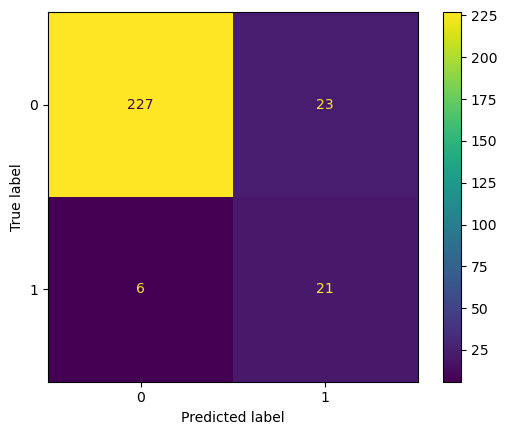

In [ ]:
#Calculate the required metrics
acc = accuracy_score(y_test_clf, predicted_y)
recall = recall_score(y_test_clf, predicted_y)
precision = precision_score(y_test_clf, predicted_y)
f1 = f1_score(y_test_clf, predicted_y, average=None)

# Show metrics for test data
print(f'Measurement for Test data:')
print(f'  Accuracy: {acc:.5f}')
print(f'  Recall: {recall:.5f}')
print(f'  Precision: {precision:.5f}')
print(f'  F1: {f1}')

# Show confusion matrix for test data
ConfusionMatrixDisplay.from_predictions(y_test_clf,predicted_y)

Measurement for Train data:
  Accuracy: 0.95471
  Recall: 0.98361
  Precision: 0.71429
  F1: [0.97393118 0.82758621]


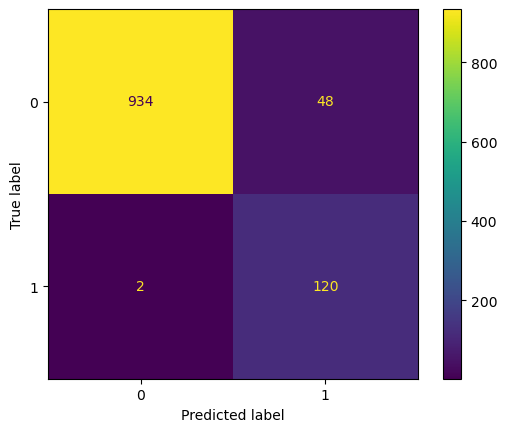

In [ ]:
#Check metrics for train data
predicted_y_train = best_clf.predict(X_train)

#Calculate required metrics
acc = accuracy_score(y_train_clf, predicted_y_train)
recall = recall_score(y_train_clf, predicted_y_train)
precision = precision_score(y_train_clf, predicted_y_train)
f1 = f1_score(y_train_clf, predicted_y_train, average=None)

# Show metrics for train data
print(f'Measurement for Train data:')
print(f'  Accuracy: {acc:.5f}')
print(f'  Recall: {recall:.5f}')
print(f'  Precision: {precision:.5f}')
print(f'  F1: {f1}')

# Show confusion matrix for test data
ConfusionMatrixDisplay.from_predictions(y_train_clf,predicted_y_train)

## Q15

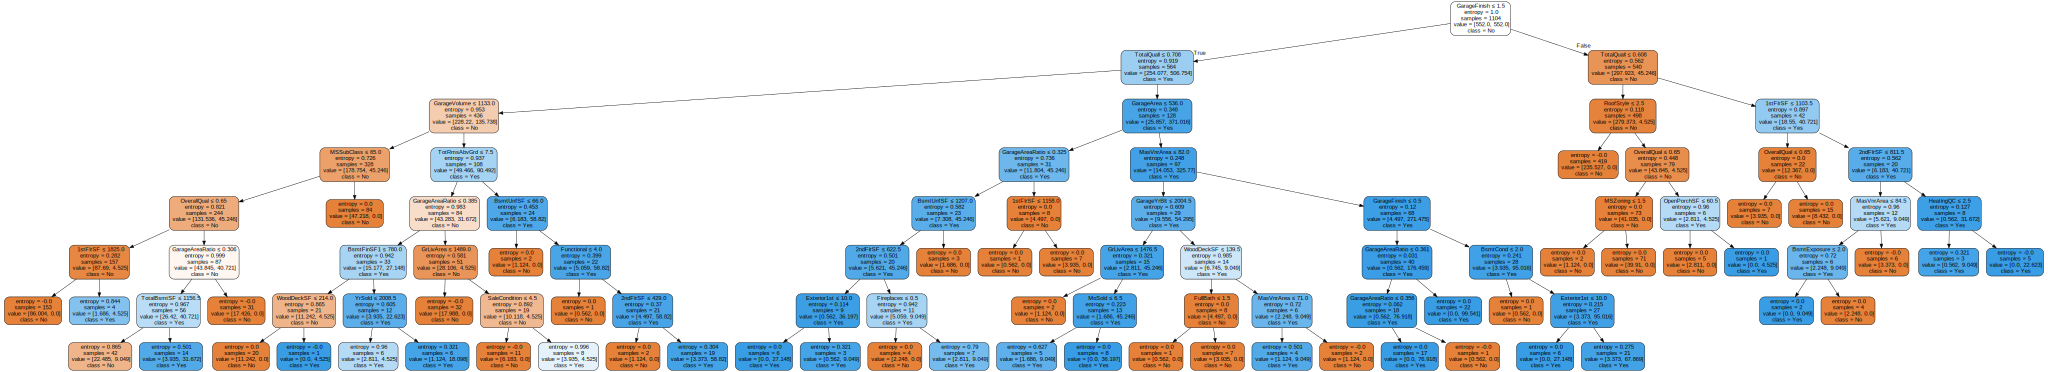

In [ ]:
#In the cmd line type: conda install python-graphviz
from sklearn.tree import export_graphviz
import graphviz

#In the cmd line type: conda install -c conda-forge pydotplus
import pydotplus # conda install -c conda-forge pydotplus

dot_data = export_graphviz(best_clf, out_file = None,
                           feature_names = X.columns,
                           class_names = ['No', 'Yes' ],
                           rounded = True, filled=True, special_characters=True)
graph1 = graphviz.Source(dot_data)

# save image to show below in markdown
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree_clf.png')
#show the full graph
graph1

Decision Tree Feature Importance


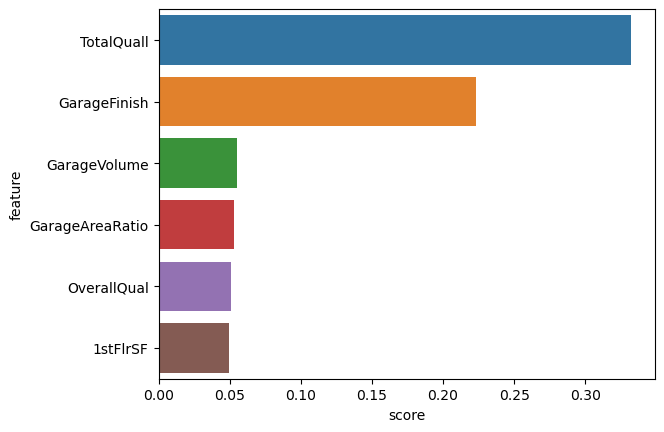

In [ ]:
%matplotlib inline
feature_score_DT = best_clf.feature_importances_
df_feature_DT = pd.DataFrame(data=list(X_train), columns=["feature"])
df_feature_DT["score"]= feature_score_DT
df_feature_DT = df_feature_DT.sort_values(by=['score'], ascending=False)
sns.barplot(y="feature", x="score", data=df_feature_DT.nlargest(6, 'score')) #Show only the top 6
print('Decision Tree Feature Importance')
plt.show()

### Correlation

In [ ]:
corr_list = list(df_feature_DT.nlargest(6, 'score').feature)
corr_list.append('Class')

In [ ]:
correlate = processed_train[corr_list].corr()
correlate.to_excel('best_features.xlsx')

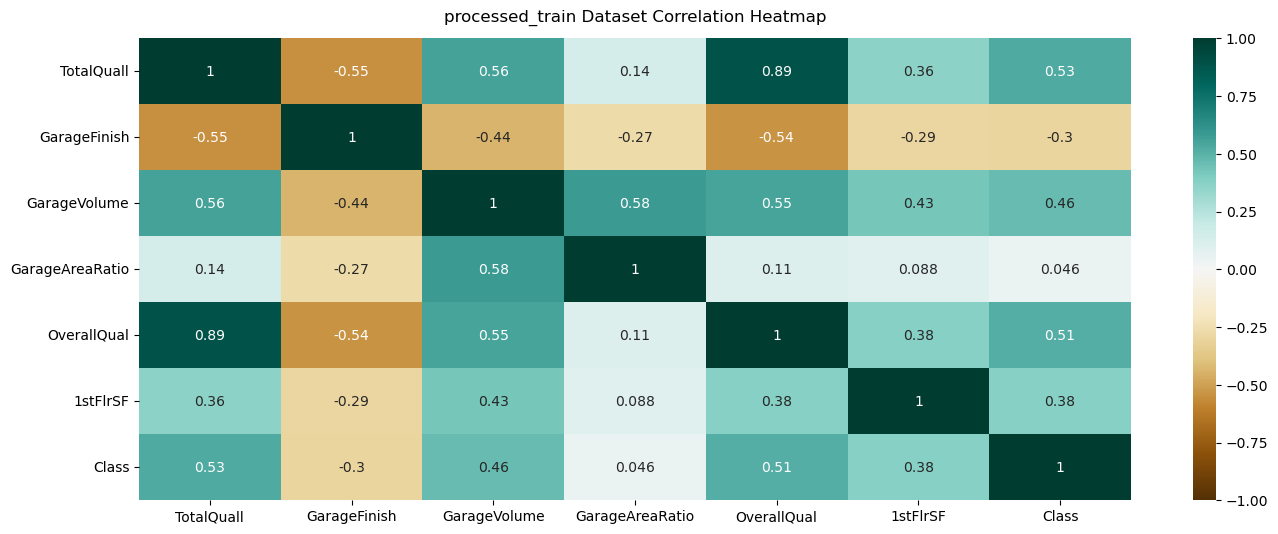

In [ ]:
# Display correlation map with a more useful layout
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(correlate, vmin=-1, vmax=1, annot=True,cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('processed_train Dataset Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Correlation explanations

    0 - The price of the house is less than 250000
    1 - The price of the house is higher than 250000

* The feature with the highest correlation with our target variable is the rating and quality of the material (TotalQuall), which means the     most it influences the target variable in direct proportion.

* OverallQual feature has high correlation with the target variable as well, which means that overall materials finish of the house leads to higher price tag

* As we can see, the correlation between GarageVolume and the target variable is positive. We can infer that a house with larger garage volume, has a higher price.

* House with more first floor sqrt. Is more likely to be sold at 250,000$ price tag or more.

* It seems that the ratio between garage volume and the living area ground doesn’t have an affect on the house price.

* The GarageFinish feature has a negative correlation with our target variable. It makes sense, since houses with un-finished Garage will be sold for a fewer price.

# Q16 - Threshold

In [ ]:
#create array of probabilities
y_test_predict_proba = best_clf.predict_proba(X_test)
y_test_predict_proba

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.11050725, 0.88949275],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.04734187, 0.95265813],
       [0.05423026, 0.94576974],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.05423026, 0.94576974],
       [1.

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = y_test_clf, probas_pred = y_test_predict_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

 Precision =  [0.09747292 0.40384615 0.47727273 0.51219512 0.525      0.55263158
 0.54054054 0.52941176 0.5862069  0.57142857 0.73684211 0.76923077
 1.        ] 
 Recalls =  [1.         0.77777778 0.77777778 0.77777778 0.77777778 0.77777778
 0.74074074 0.66666667 0.62962963 0.59259259 0.51851852 0.37037037
 0.        ] 
 Thresholds =  [0.         0.28696669 0.53485839 0.61683417 0.72848665 0.84291845
 0.88949275 0.88949275 0.94151486 0.94576974 0.95265813 1.        ]


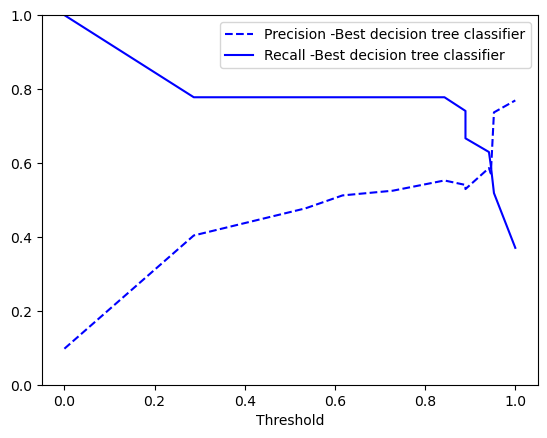

In [ ]:
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, color = "k", label = None):
    plt.plot (thresholds, precisions[:-1], color+"--", label="Precision -"+label)
    plt.plot (thresholds, recalls[:-1], color+"-", label="Recall -"+label)
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="Best decision tree classifier")
plt.legend(loc = "best")
plt.show()

As we can see, in order to get better Recall, along with good Precision, we should make our threshold around 0.95 (Instead of 0.5, the default)

# Q17

In [ ]:
# Import an excel file with the data
data = pd.read_excel('QuestionZohar.xlsx')

# Display the data
display(data)

,Name,Followers
0,Mili,200004
1,Eden,195023
2,Noam,201100
3,Bar,87023
4,Agam,184245
5,Bilha,120


In [ ]:
#Get the number of followers Mili has
mili_followers = data.loc[data['Name']== 'Mili', 'Followers'][0]

In [ ]:
#Get the numeber of followers all Mili's friends has
friends_followers = data.loc[data['Name'] != 'Mili']['Followers']

In [ ]:
#Step 1 - Compute the mean of the sample
mean_friends = np.mean(friends_followers)
print(mean_friends)

133502.2


* H0: The average followers is: 133502.2
* H1: Millie's number of followers is larger than average

In [ ]:
#Step 2 - Bootstrap and calculate means of each iteration
mean_list = []
iterations = 10000
for i in range(10000):
    bs = np.random.choice(friends_followers, size=len(friends_followers), replace = True)
    bs_mean = np.mean(bs)
    mean_list.append(bs_mean)

In [ ]:
count_above_mili = len([i for i in mean_list if i >= mili_followers])

In [ ]:
p_value = (count_above_mili / iterations) * 100 #Convert to %
p = 5 #p value is 5%

In [ ]:
print(f'Mili has {mili_followers:,} followers')
print(f'P Value is: {p_value}%')
print(f'P is: {p}%')
print()
if p_value <=  p:
    print('Mili has more followers than her friends')
else:
    print("Mili doesn't hve more followers than her friedns")

Mili has 200,004 followers
P Value is: 0.06%
P is: 5%

Mili has more followers than her friends


As p < p_value we will reject H_0, and accept H1 - > Mili has more followers